<a href="https://colab.research.google.com/github/Tilak-Shenoy/IE517/blob/main/IE517_S23_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# Upload file from the system. We are using High Yield Corporate Bond dataset in this case
from google.colab import files
data_to_load = files.upload()

Saving treasury yield curve data.csv to treasury yield curve data.csv


# Exploratory Data Analysis

In [116]:
#Save the data into a dataframe
df = pd.read_csv('treasury yield curve data.csv')
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [117]:
#Describe data
df.describe(percentiles = [.01, .10, .25, 0.50, .75, .975, .99])

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
1%,0.163670,0.413550,0.795690,1.234880,1.684310,1.995630,2.224550,2.330270,2.398540,2.461870,...,2.752610,2.568840,2.381860,2.211580,2.081560,1.959240,1.854690,1.756430,1.681290,2.839298
10%,0.332600,1.069000,1.750700,2.250500,2.502900,2.701500,2.879400,2.981200,3.060400,3.099900,...,3.474900,3.479100,3.473400,3.464300,3.430300,3.382800,3.314200,3.241300,3.155000,2.942279
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
97.5%,8.509100,8.679775,8.850400,9.003400,9.160025,9.302225,9.435500,9.530700,9.593550,9.613750,...,8.824950,8.836875,8.874175,8.929800,8.965475,9.000700,9.043575,9.100500,9.132575,9.794909


In [118]:
# Pull the number of rows and columns in the data
df.shape

(8071, 32)

In [119]:
# Print all column names
df.columns.values

array(['Date', 'SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05',
       'SVENF06', 'SVENF07', 'SVENF08', 'SVENF09', 'SVENF10', 'SVENF11',
       'SVENF12', 'SVENF13', 'SVENF14', 'SVENF15', 'SVENF16', 'SVENF17',
       'SVENF18', 'SVENF19', 'SVENF20', 'SVENF21', 'SVENF22', 'SVENF23',
       'SVENF24', 'SVENF25', 'SVENF26', 'SVENF27', 'SVENF28', 'SVENF29',
       'SVENF30', 'Adj_Close'], dtype=object)

In [120]:
# Describe each column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8071 non-null   object 
 1   SVENF01    8071 non-null   float64
 2   SVENF02    8071 non-null   float64
 3   SVENF03    8071 non-null   float64
 4   SVENF04    8071 non-null   float64
 5   SVENF05    8071 non-null   float64
 6   SVENF06    8071 non-null   float64
 7   SVENF07    8071 non-null   float64
 8   SVENF08    8071 non-null   float64
 9   SVENF09    8071 non-null   float64
 10  SVENF10    8071 non-null   float64
 11  SVENF11    8071 non-null   float64
 12  SVENF12    8071 non-null   float64
 13  SVENF13    8071 non-null   float64
 14  SVENF14    8071 non-null   float64
 15  SVENF15    8071 non-null   float64
 16  SVENF16    8071 non-null   float64
 17  SVENF17    8071 non-null   float64
 18  SVENF18    8071 non-null   float64
 19  SVENF19    8071 non-null   float64
 20  SVENF20 

In [121]:
# Findig missing values
for col in df.columns.values:
  print(col, df[col].eq('Nan').sum())

Date 0
SVENF01 0
SVENF02 0
SVENF03 0
SVENF04 0
SVENF05 0
SVENF06 0
SVENF07 0
SVENF08 0
SVENF09 0
SVENF10 0
SVENF11 0
SVENF12 0
SVENF13 0
SVENF14 0
SVENF15 0
SVENF16 0
SVENF17 0
SVENF18 0
SVENF19 0
SVENF20 0
SVENF21 0
SVENF22 0
SVENF23 0
SVENF24 0
SVENF25 0
SVENF26 0
SVENF27 0
SVENF28 0
SVENF29 0
SVENF30 0
Adj_Close 0


Q-Q Plot of SVENF01


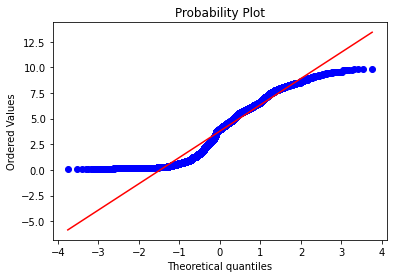

Q-Q Plot of SVENF02


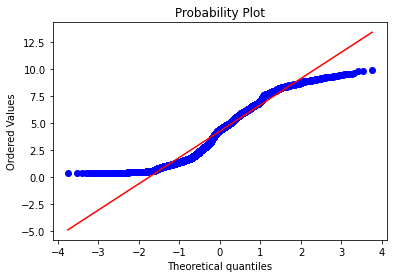

Q-Q Plot of SVENF03


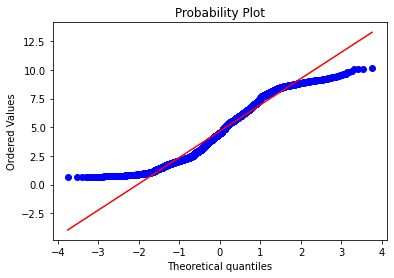

Q-Q Plot of SVENF04


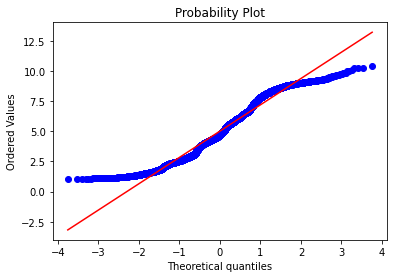

Q-Q Plot of SVENF05


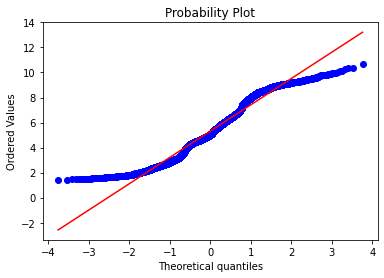

Q-Q Plot of SVENF06


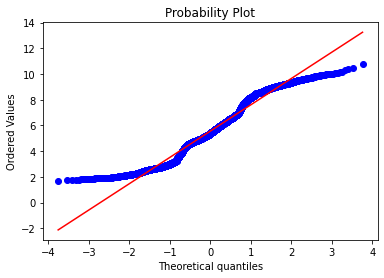

Q-Q Plot of SVENF07


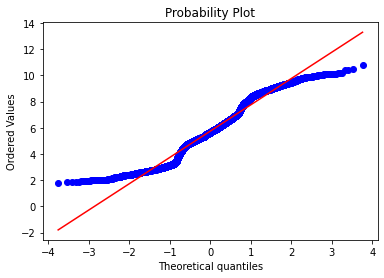

Q-Q Plot of SVENF08


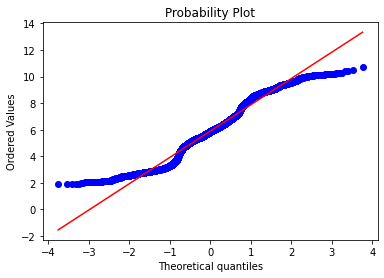

Q-Q Plot of SVENF09


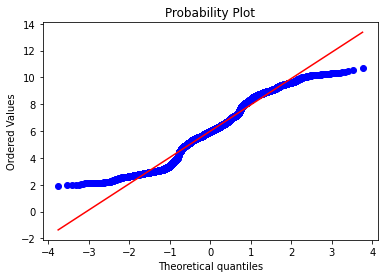

Q-Q Plot of SVENF10


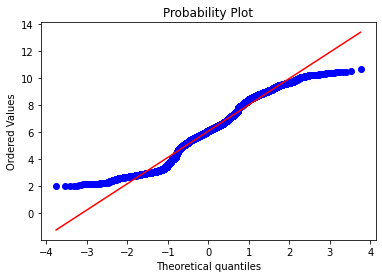

Q-Q Plot of SVENF11


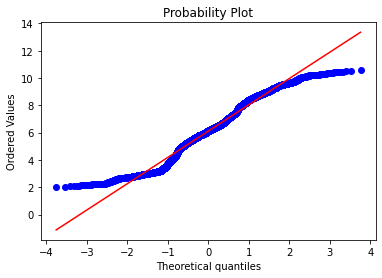

Q-Q Plot of SVENF12


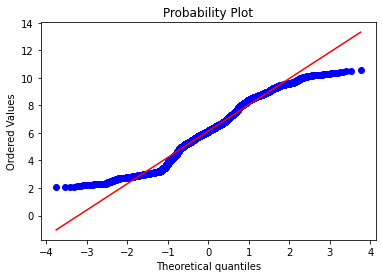

Q-Q Plot of SVENF13


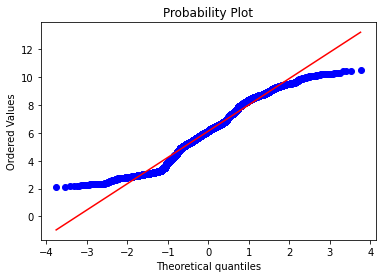

Q-Q Plot of SVENF14


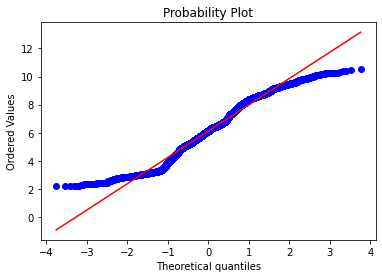

Q-Q Plot of SVENF15


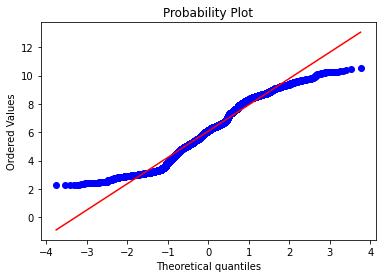

Q-Q Plot of SVENF16


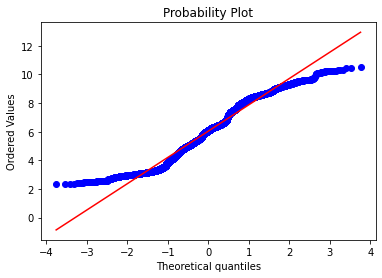

Q-Q Plot of SVENF17


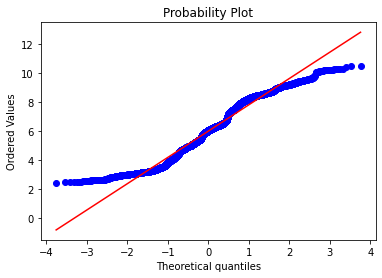

Q-Q Plot of SVENF18


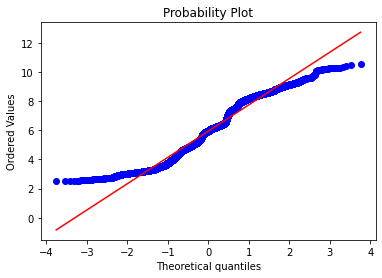

Q-Q Plot of SVENF19


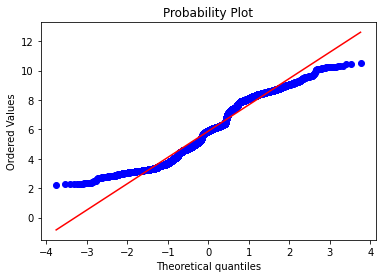

Q-Q Plot of SVENF20


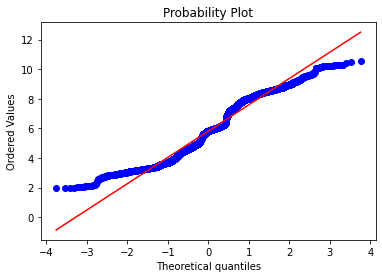

Q-Q Plot of SVENF21


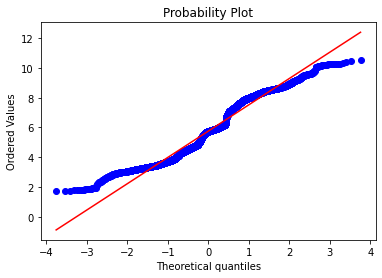

Q-Q Plot of SVENF22


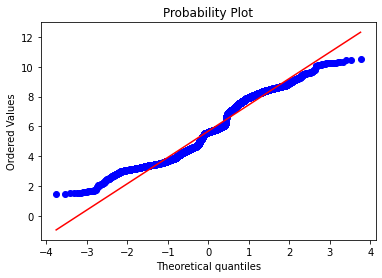

Q-Q Plot of SVENF23


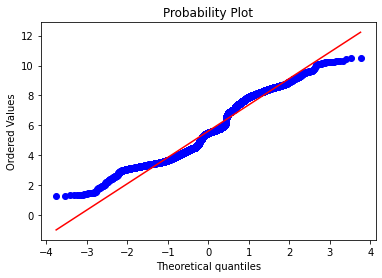

Q-Q Plot of SVENF24


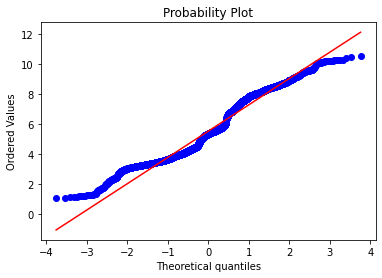

Q-Q Plot of SVENF25


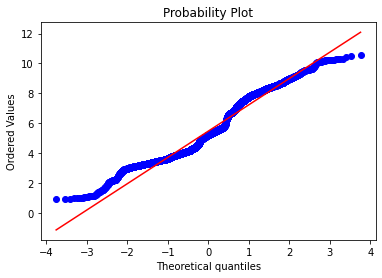

Q-Q Plot of SVENF26


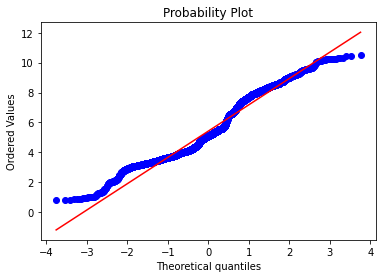

Q-Q Plot of SVENF27


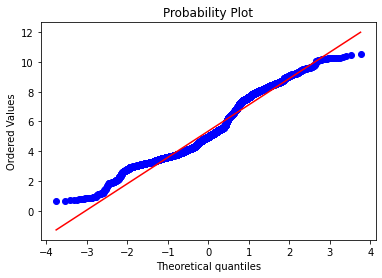

Q-Q Plot of SVENF28


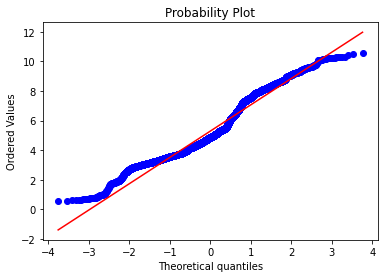

Q-Q Plot of SVENF29


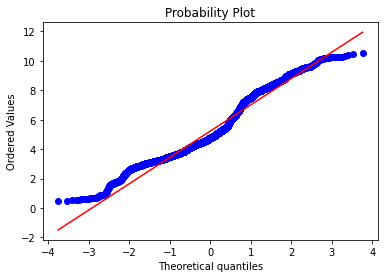

Q-Q Plot of SVENF30


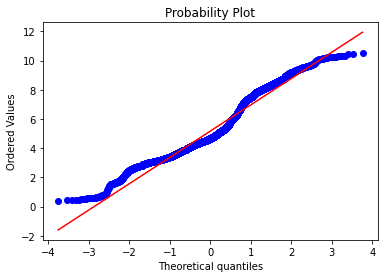

Q-Q Plot of Adj_Close


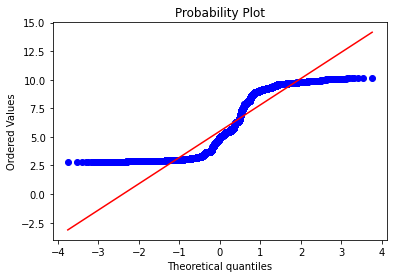

In [122]:
col_continuous = []
for col in df.columns.values:
  if(type(df[col][0]) != str):
    col_continuous.append(col)
    print('Q-Q Plot of', col)
    stats.probplot(df[col], dist="norm", plot=pylab)
    pylab.show()

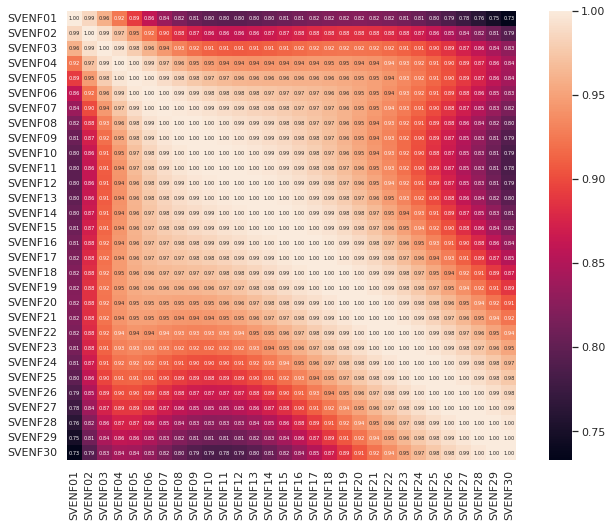

In [147]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.5)
sns.set(rc={'figure.figsize':(11.7,8.27)})
hm = sns.heatmap(cm, cbar = True, annot=True, square=True, fmt='.2f', annot_kws={'size':5}, yticklabels=cols, xticklabels=cols)
plt.show()

# Linear Regression and SVM on baseline

In [124]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
df.columns.values

array(['Date', 'SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05',
       'SVENF06', 'SVENF07', 'SVENF08', 'SVENF09', 'SVENF10', 'SVENF11',
       'SVENF12', 'SVENF13', 'SVENF14', 'SVENF15', 'SVENF16', 'SVENF17',
       'SVENF18', 'SVENF19', 'SVENF20', 'SVENF21', 'SVENF22', 'SVENF23',
       'SVENF24', 'SVENF25', 'SVENF26', 'SVENF27', 'SVENF28', 'SVENF29',
       'SVENF30', 'Adj_Close'], dtype=object)

In [126]:
# Building Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print('R2 score training data ',r2_score(y_train, y_pred))
print('RMSE training data', mean_squared_error(y_train, y_pred))

R2 score training data  0.9028303049946006
RMSE training data 0.6000656322263399


In [127]:
y_pred_test = lr.predict(X_test)
print('R2 score test data',r2_score(y_test, y_pred_test))
print('RMSE test data', mean_squared_error(y_test, y_pred_test))

R2 score test data 0.9013682631945524
RMSE test data 0.6235016902864309


## Building SVM

In [128]:
# Instantiating linear SVM
clf_svm = svm.SVR(kernel = 'linear')

In [129]:
# Training the model
clf_svm.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [130]:
y_pred_train = clf_svm.predict(X_train)

In [131]:
# Determine the coeffiecient of determination
print('coefficient of determination: ',clf_svm.score(X_train,y_train))
print('RMSE train: ', mean_squared_error(y_train, y_pred_train))

coefficient of determination:  0.893958822856785
RMSE train:  0.6548509388748497


In [132]:
# Testing the data
y_pred_test = clf_svm.predict(X_test)
print('coefficient of determination: ',clf_svm.score(X_test,y_test))
print('RMSE test: ', mean_squared_error(y_test, y_pred_test))

coefficient of determination:  0.8910307579350023
RMSE test:  0.6888503519995274


# PCA on the baseline

In [133]:
# Standardizing the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [150]:
pca_all = PCA()
X_train_pc_all = pca_all.fit_transform(X_train_std)
X_test_pc_all = pca_all.fit_transform(X_test_std)

In [151]:
pca_all.explained_variance_ratio_

array([9.30754543e-01, 4.24852818e-02, 2.08973566e-02, 5.12010013e-03,
       6.67458355e-04, 6.50431576e-05, 8.99689510e-06, 1.13350038e-06,
       8.00387720e-08, 6.38041174e-09, 4.61951511e-10, 3.69523339e-11,
       9.43173319e-12, 9.23277111e-12, 8.92440146e-12, 8.75796319e-12,
       8.45199179e-12, 8.27941513e-12, 8.13607220e-12, 8.04479392e-12,
       7.81421581e-12, 7.67771684e-12, 7.44699863e-12, 7.42544894e-12,
       7.13348470e-12, 6.98905033e-12, 6.79376309e-12, 6.21358798e-12,
       6.13873796e-12, 5.75341783e-12])

In [153]:
pca = PCA(n_components=3)
X_train_pc = pca.fit_transform(X_train_std)
X_test_pc = pca.fit_transform(X_test_std)

In [154]:
pca.explained_variance_ratio_

array([0.93075454, 0.04248528, 0.02089736])

In [156]:
np.sum(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2])

0.9941371809059654

In [136]:
# Building linear regression
lin_reg_pc = LinearRegression()
lin_reg_pc.fit(X_train_pc[:,:3], y_train)

LinearRegression()

In [137]:
# Generating training accuracy
y_pred = lin_reg_pc.predict(X_train_pc[:,:3])
print('R2 test data',r2_score(y_train, y_pred))
print('RMSE of test data: ', mean_squared_error(y_train,y_pred))

R2 test data 0.8683246238398339
RMSE of test data:  0.8131533997281835


In [138]:
y_pred_test = lin_reg_pc.predict(X_test_pc[:,:3])
print('R2 test data: ',r2_score(y_test, y_pred_test))
print('RMSE of test data: ', mean_squared_error(y_test, y_pred_test))

R2 test data:  0.8613623507378776
RMSE of test data:  0.8763995388500189


In [139]:
# Building SVM
clf_svm = svm.SVR(kernel = 'linear')
clf_svm.fit(X_train_pc[:,:3], y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [140]:
y_pred = clf_svm.predict(X_train_pc[:,:3])
print('R2 Score training: ',r2_score(y_train, y_pred))
print('RMSE of training data: ', mean_squared_error(y_train, y_pred))

R2 Score training:  0.863809672441882
RMSE of training data:  0.8410352116957172


In [141]:
y_pred_test = clf_svm.predict(X_test_pc[:,:3])
print('R2 Score test: ',r2_score(y_test, y_pred_test))
print('RMSE of test data: ', mean_squared_error(y_test, y_pred_test))

R2 Score test:  0.8559047729603323
RMSE of test data:  0.9108996812928233


In [142]:
print("My name is Tilak Shenoy")
print("My NetID is: tshenoy2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Tilak Shenoy
My NetID is: tshenoy2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
